<a href="https://colab.research.google.com/github/garridoreb/NotebooksPython-Reb/blob/main/P2_RL_RebecaGarridoGuerrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/09-Regresion-Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⭕ Práctica *final* de clasificación

Vamos a retomar el dataset de la sesión pasada (dataset PIMA). El objetivo es tener el mejor modelo posible con cada uno de los siguientes algoritmos:

* SVM
* Decision Tree
* Random Forest
* Regresión Logística

Con esto haremos una comparación entre ellos.

Los pasos a seguir son:

1. Prepara el dataset para los algoritmo, recuerda que hay algunos valores faltantes. Además, recuerda reescalar los datos apropiadamente.

2. Usando como dataset el dataset preprocesado del paso anterior, realiza una busqueda de parámetros con cada algoritmo de acuerdo a las siguientes opciones:

* SVM
 * C: 0.1,1,10,100
 * kernel: lineal, polinomial, rbf
 * grados (polinomial): 2,3,5
* Decision Tree
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Random Forest
 * criterion: gini, entropy, log_loss
 * max_depth: None, 10, 20,
 * min_samples_split: 2, 3, 5
* Regresión Logística
 * C: 0.1,1,10
 * penalty: l1, l2, elasticnet, None

3. Considerando los 4 mejores modelos anteriores. ¿Qué clasificador tiene mejor rendimiento en este dataset? Para esto toma en cuenta el accuracy en el conjunto de prueba.

In [2]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(df['glucose'].unique())

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


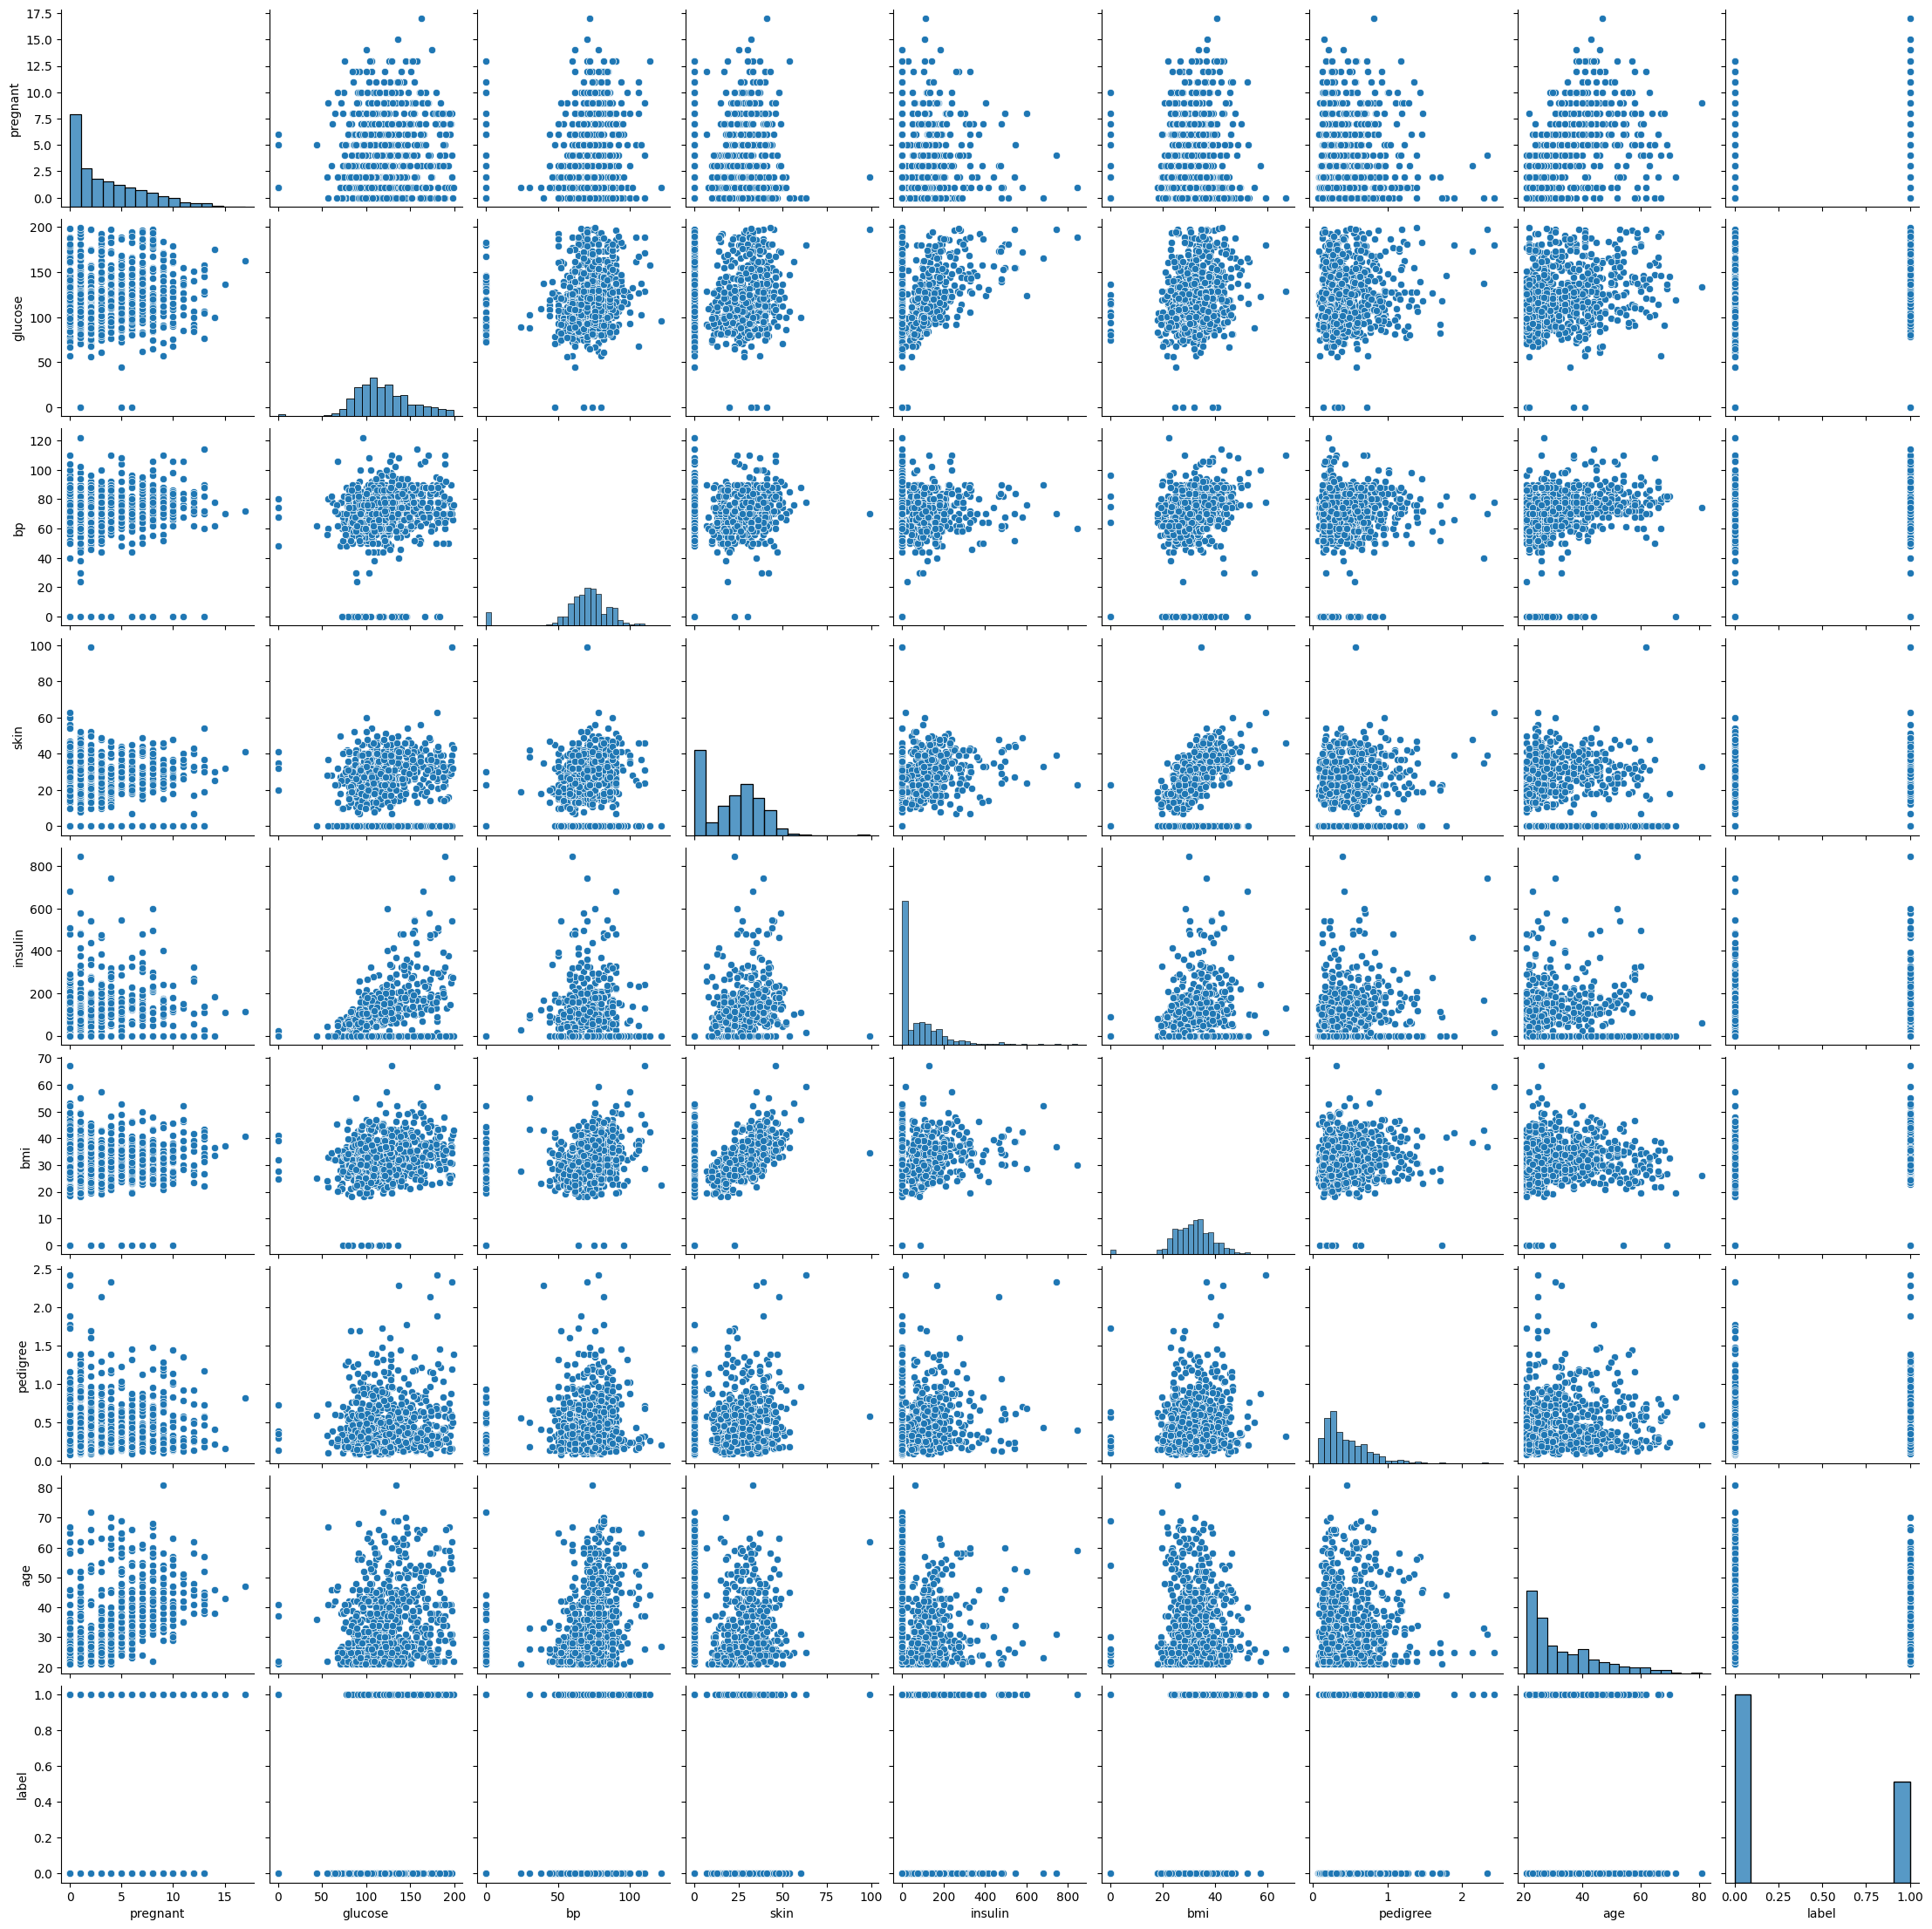

In [5]:
import seaborn as sns
g = sns.pairplot(df)
print(g)

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

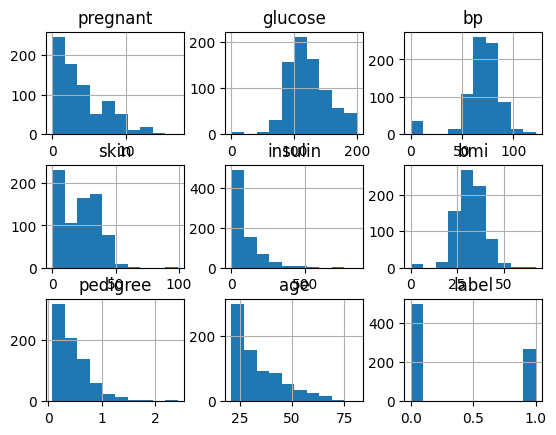

In [6]:
df.hist()

<ipython-input-7-a617533b092a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Zero_Count', data = zeros_df, palette='viridis')


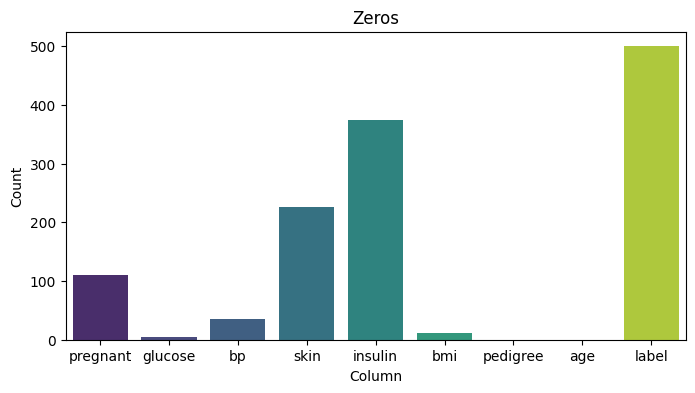

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Contar los CEROS (0´s) en cada columna
zeros = df.apply(lambda col:(col == 0).sum())

# Crear un DataFrame para los conteos
zeros_df = zeros.reset_index()
zeros_df.columns = ['Column', 'Zero_Count']

# Graficar los conteos de CEROS (0´s) con seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Column', y='Zero_Count', data = zeros_df, palette='viridis')
plt.title('Zeros')
plt.xlabel('Column')
plt.ylabel('Count')
plt.show()

In [8]:
display(df[df['glucose'].isnull()])
print(f"Valores nulos para glucose: {df[df['glucose'].isnull()].shape[0]}")

display(df[df['bp'].isnull()])
print(f"Valores nulos para bp: {df[df['bp'].isnull()].shape[0]}")

display(df[df['bmi'].isnull()])
print(f"Valores nulos para bmi: {df[df['bmi'].isnull()].shape[0]}")

display(df[df['skin'].isnull()])
print(f"Valores nulos para skin: {df[df['skin'].isnull()].shape[0]}")

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label


Valores nulos para glucose: 0


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label


Valores nulos para bp: 0


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label


Valores nulos para bmi: 0


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label


Valores nulos para skin: 0


In [9]:
import numpy as np

df[['glucose', 'bp', 'bmi', 'skin']] = df[['glucose', 'bp', 'bmi', 'skin']].replace(0, np.nan)
print(df['bp'].unique())

[ 72.  66.  64.  40.  74.  50.  nan  70.  96.  92.  80.  60.  84.  30.
  88.  90.  94.  76.  82.  75.  58.  78.  68. 110.  56.  62.  85.  86.
  48.  44.  65. 108.  55. 122.  54.  52.  98. 104.  95.  46. 102. 100.
  61.  24.  38. 106. 114.]


In [10]:
print(df['glucose'].info())

<class 'pandas.core.series.Series'>
Index: 768 entries, 0 to 767
Series name: glucose
Non-Null Count  Dtype  
--------------  -----  
763 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB
None


In [11]:
print(df)

     pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  label
0           6    148.0  72.0  35.0        0  33.6     0.627   50      1
1           1     85.0  66.0  29.0        0  26.6     0.351   31      0
2           8    183.0  64.0   NaN        0  23.3     0.672   32      1
3           1     89.0  66.0  23.0       94  28.1     0.167   21      0
4           0    137.0  40.0  35.0      168  43.1     2.288   33      1
..        ...      ...   ...   ...      ...   ...       ...  ...    ...
763        10    101.0  76.0  48.0      180  32.9     0.171   63      0
764         2    122.0  70.0  27.0        0  36.8     0.340   27      0
765         5    121.0  72.0  23.0      112  26.2     0.245   30      0
766         1    126.0  60.0   NaN        0  30.1     0.349   47      1
767         1     93.0  70.0  31.0        0  30.4     0.315   23      0

[768 rows x 9 columns]


In [12]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   763 non-null    float64
 2   bp        733 non-null    float64
 3   skin      541 non-null    float64
 4   insulin   768 non-null    int64  
 5   bmi       757 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 60.0 KB
     pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  label
0           6    148.0  72.0  35.0        0  33.6     0.627   50      1
1           1     85.0  66.0  29.0        0  26.6     0.351   31      0
2           8    183.0  64.0   NaN        0  23.3     0.672   32      1
3           1     89.0  66.0  23.0       94  28.1     0.167   21      0
4           0    137.0  40.0  35.0      168  43.1     2.288  

In [13]:
df_copia = df.copy()
df_copia

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0,30.1,0.349,47,1


In [ ]:
print(none_glucose_values)

[[None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]
 [None]


In [ ]:
from sklearn.impute import SimpleImputer

nan_glucose_values = df_copia['glucose'].values
nan_bp_values = df_copia['bp'].values
nan_skin_values = df_copia['skin'].values
nan_bmi_values = df_copia['bmi'].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

new_glucose = imputer.fit_transform(nan_glucose_values.reshape(-1, 1))
new_bp = imputer.fit_transform(nan_bp_values.reshape(-1, 1))
new_skin = imputer.fit_transform(nan_skin_values.reshape(-1, 1))
new_bmi = imputer.fit_transform(nan_bmi_values.reshape(-1, 1))

pd.DataFrame(new_glucose)
pd.DataFrame(new_bp)
pd.DataFrame(new_skin)
pd.DataFrame(new_bmi)

# Si deseas actualizar la columna 'glucose' en el DataFrame original
df_copia['glucose'] = new_glucose
df_copia['bp'] = new_glucose
df_copia['skin'] = new_glucose
df_copia['bmi'] = new_glucose

print(df_copia)
#df.info()
#print(df['glucose']==0)
#print(pd.DataFrame(new_glucose))

     pregnant  glucose     bp   skin  insulin    bmi  pedigree  age  label
0           6    148.0  148.0  148.0        0  148.0     0.627   50      1
1           1     85.0   85.0   85.0        0   85.0     0.351   31      0
2           8    183.0  183.0  183.0        0  183.0     0.672   32      1
3           1     89.0   89.0   89.0       94   89.0     0.167   21      0
4           0    137.0  137.0  137.0      168  137.0     2.288   33      1
..        ...      ...    ...    ...      ...    ...       ...  ...    ...
763        10    101.0  101.0  101.0      180  101.0     0.171   63      0
764         2    122.0  122.0  122.0        0  122.0     0.340   27      0
765         5    121.0  121.0  121.0      112  121.0     0.245   30      0
766         1    126.0  126.0  126.0        0  126.0     0.349   47      1
767         1     93.0   93.0   93.0        0   93.0     0.315   23      0

[768 rows x 9 columns]


In [ ]:
import pandas as pd
from google.colab import data_table

data_table.DataTable(df_copia, include_index=True, num_rows_per_page=10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,148.0,148.0,0,148.0,0.627,50,1
1,1,85.0,85.0,85.0,0,85.0,0.351,31,0
2,8,183.0,183.0,183.0,0,183.0,0.672,32,1
3,1,89.0,89.0,89.0,94,89.0,0.167,21,0
4,0,137.0,137.0,137.0,168,137.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,101.0,101.0,180,101.0,0.171,63,0
764,2,122.0,122.0,122.0,0,122.0,0.340,27,0
765,5,121.0,121.0,121.0,112,121.0,0.245,30,0
766,1,126.0,126.0,126.0,0,126.0,0.349,47,1


In [ ]:
y = df_copia['label'].values

df_copia.drop(columns='label', inplace=True)
df_copia.info()

X_df = df_copia
X_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    float64
 2   bp        768 non-null    float64
 3   skin      768 non-null    float64
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148.0,148.0,148.0,0,148.0,0.627,50
1,1,85.0,85.0,85.0,0,85.0,0.351,31
2,8,183.0,183.0,183.0,0,183.0,0.672,32
3,1,89.0,89.0,89.0,94,89.0,0.167,21
4,0,137.0,137.0,137.0,168,137.0,2.288,33


In [ ]:
X = X_df.values
print(X.shape)

(768, 8)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1001)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:3,:5])
print(X_test[:3,:5])

[[-0.83495861  0.70642335  0.70642335  0.70642335  1.97993411]
 [-1.13044253  0.18147855  0.18147855  0.18147855  1.11928212]
 [ 0.64246095 -1.13088344 -1.13088344 -1.13088344 -0.68808706]]
[[-0.83495861  0.0174333   0.0174333   0.0174333   0.65453004]
 [-0.5394747  -0.73717484 -0.73717484 -0.73717484  0.68895612]
 [-0.24399079 -0.17942099 -0.17942099 -0.17942099 -0.68808706]]


In [14]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import time
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
clfs = [DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        LogisticRegression(),
        GaussianNB(),
        KNeighborsClassifier(),
        AdaBoostClassifier(estimator=SVC(),algorithm='SAMME'),
        AdaBoostClassifier(estimator=GaussianNB(),algorithm='SAMME'),
        BaggingClassifier(estimator=SVC())]

names = [x.__class__.__name__ for x in clfs]  # Obtener el nombre de cada clasificador, como <string>
names[-3] += '_SVC'
names[-2] += '_GNB'
names[-1] += '_SVC'
times = []
accs = []

for clf in clfs:
    pl = Pipeline([('scl',StandardScaler()),
                    ('clf',clf)])
    start = time.time()
    pl.fit(X_train,y_train)
    end = time.time()
    times.append(end-start)
    y_pred = pl.predict(X_test)
    accs.append(accuracy_score(y_test,y_pred))

resultados_df = pd.DataFrame(data={'algoritmo': names,
                   'accuracy': accs,
                   'duración': times})

In [ ]:
resultados_df.sort_values(by='accuracy',ascending=False)

,algoritmo,accuracy,duración
2,SVC,0.792208,0.024348
3,LogisticRegression,0.792208,0.022106
8,BaggingClassifier_SVC,0.779221,0.123107
4,GaussianNB,0.766234,0.002725
7,AdaBoostClassifier_GNB,0.759740,0.018450
5,KNeighborsClassifier,0.753247,0.004380
1,RandomForestClassifier,0.746753,0.342292
0,DecisionTreeClassifier,0.707792,0.009834
6,AdaBoostClassifier_SVC,0.655844,0.218218


In [ ]:
resultados_df.sort_values(by='duración',ascending=True)

,algoritmo,accuracy,duración
4,GaussianNB,0.766234,0.002725
5,KNeighborsClassifier,0.753247,0.004380
0,DecisionTreeClassifier,0.707792,0.009834
7,AdaBoostClassifier_GNB,0.759740,0.018450
3,LogisticRegression,0.792208,0.022106
2,SVC,0.792208,0.024348
8,BaggingClassifier_SVC,0.779221,0.123107
6,AdaBoostClassifier_SVC,0.655844,0.218218
1,RandomForestClassifier,0.746753,0.342292


Hay más clasificadores que es importante revisar. Con las herramientas que ya cuentas, ya puedes revisarlos por tu cuenta:

* [K-nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
* [Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis)
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)
* ...

[Más información](https://scikit-learn.org/stable/supervised_learning.html), [comparación](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).